# このノートブックについて

とあるライブのチケットの当選率をベイズを用いて推定した

# ライブラリインポート

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as stats
import seaborn as sns
import pymc3 as pm
import arviz as az
import pandas as pd

# 事前分布
事前分布は今までの全体の当選率を算出したかったが、データが得られなかった。  
そこで、そのライブの収容人数　/ そのアーティストが行ったライブの中で最も収容できた人数  
で、算出した。  
また、一様分布でも試してみた。

In [64]:
mm_mu = round((16000 / 66000), 2)
mm_mu

0.24

0.25252525252525254


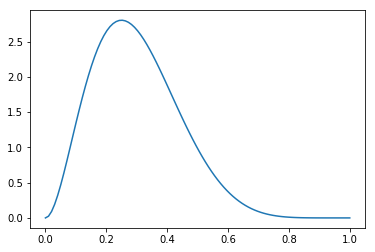

In [116]:
# 事前データを考慮に入れた事前分布
x = np.linspace(0, 1, 100)
y = stats.beta(3, 7).pdf(x)
plt.plot(x, y)
print(x[np.argmax(y)])
plt.show()

0.0


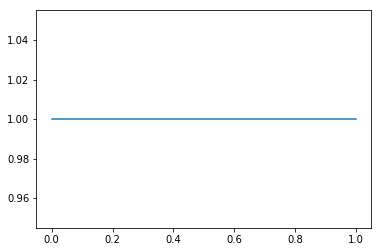

In [118]:
# 一様分布
x = np.linspace(0, 1, 100)
y = stats.beta(1, 1).pdf(x)
plt.plot(x, y)
print(x[np.argmax(y)])
plt.show()

# データ
とある人がそのライブに4回応募し、1回当選した

In [119]:
data = np.array([0, 1, 0, 0])

# モデル

## 事前データを考慮に入れる

In [120]:
with pm.Model() as model:
    theta = pm.Beta("theta", alpha=3, beta=7)
    y = pm.Bernoulli("y", p=theta,observed=data)
    
    trace = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5769.85draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c21369c18>,
      dtype=object)

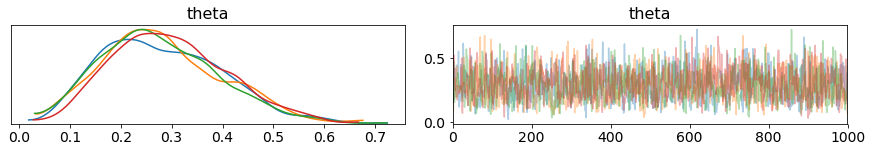

In [121]:
az.plot_trace(trace)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c21b3a9e8>],
      dtype=object)

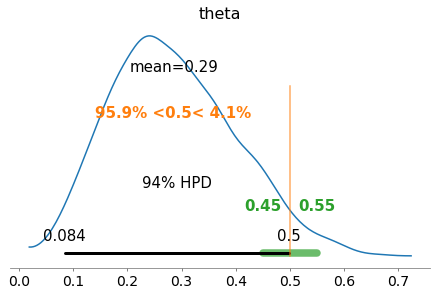

In [122]:
az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5)

## 一様分布で行う

In [123]:
with pm.Model() as model_2:
    theta_2 = pm.Beta("theta", alpha=1, beta=1)
    y_2 = pm.Bernoulli("y", p=theta_2,observed=data)
    
    trace_2 = pm.sample(1000)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (4 chains in 4 jobs)
NUTS: [theta]
Sampling 4 chains: 100%|██████████| 6000/6000 [00:01<00:00, 5728.49draws/s]


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22334be0>,
      dtype=object)

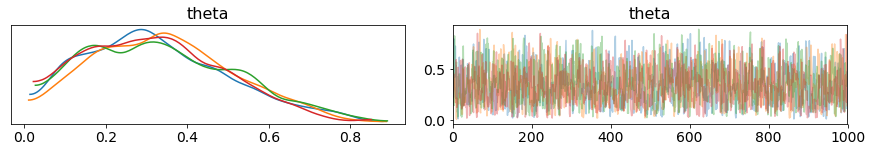

In [124]:
az.plot_trace(trace_2)

array([<matplotlib.axes._subplots.AxesSubplot object at 0x1c22640e10>],
      dtype=object)

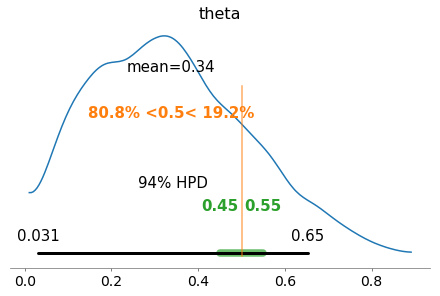

In [125]:
az.plot_posterior(trace_2, rope=[0.45, 0.55], ref_val=0.5)

# まとめ

Text(0.5, 1.0, 'Uniform')

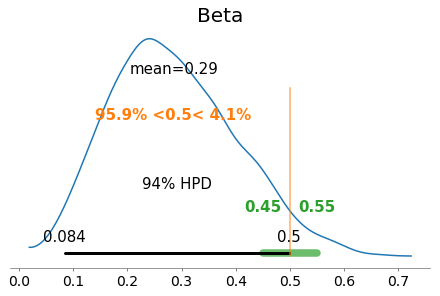

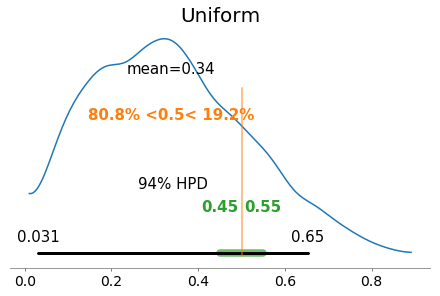

In [130]:
az.plot_posterior(trace, rope=[0.45, 0.55], ref_val=0.5)
plt.title("Beta", fontsize=20)
az.plot_posterior(trace_2, rope=[0.45, 0.55], ref_val=0.5)
plt.title("Uniform",  fontsize=20)